# Project 3: Delayed oscillator ENSO model

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

### A toy model

A ’toy’ model of the ENSO wave oscillator is the delay equation for the spatially averaged eastern Pacific temperatured

$$ \frac{dT(t)}{dt} = aT(t) - bT(t-d) -c T(t)^3 $$

Here $a$ represents the growth rate of the temperature disturbance $T$ in the eastern Pacific. The quantity $d$ is the delay time due to the propagation of equatorial waves, and $b$ measures its influence with respect to the local feedbacks. The nonlinear term with coefficient $c$ isneeded for equilibration of the temperature to finite amplitude. Again, additive noise isassumed with variance $\sigma$.

### Stability analysis

Using the rescaling $t \mapsto \frac{t}{a}$ and $T \mapsto \sqrt{\frac{a}{c}}$, the equation becomes

$$ \frac{dT(t)}{dt} = T(t) - \alpha T(t-\delta) - T(t)^3 $$

Fixed points hence satisfy 

$$\frac{dT}{dt} = (1 - \alpha) T - T^3 = 0$$

where we use that, if T is constant, $T(t-d) = T(t) = T$. This gives us the following fixed points:
- $T = \{0, \sqrt{1 - \alpha}, -\sqrt{1 - \alpha} \} \qquad \alpha < 1$
- $T = 0 \hspace{9.9em}\alpha \ge 1$

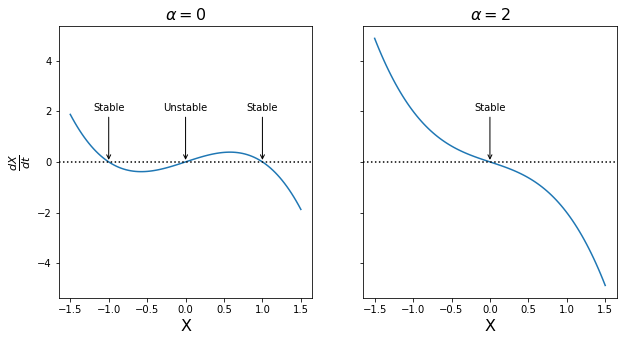

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
X = np.linspace(-1.5, 1.5, 100)
ax1.plot(X, X - X**3)
ax1.axhline(y=0, color='k', linestyle=':')
ax1.set_title(r'$\alpha=0$', fontsize=16)
ax1.set_xlabel('X', fontsize=16)
ax1.set_ylabel(r'$\frac{dX}{dt}$', fontsize=16)
ax1.annotate('Unstable', (0, 0), (0, 2), arrowprops={'arrowstyle': '->'}, ha='center')
ax1.annotate('Stable', (-1, 0), (-1, 2), arrowprops={'arrowstyle': '->'}, ha='center')
ax1.annotate('Stable', (1, 0), (1, 2), arrowprops={'arrowstyle': '->'}, ha='center')
ax2.plot(X, -X - X**3)
ax2.axhline(y=0, color='k', linestyle=':')
ax2.set_title(r'$\alpha=2$', fontsize=16)
ax2.set_xlabel('X', fontsize=16)
ax2.annotate('Stable', (0, 0), (0, 2), arrowprops={'arrowstyle': '->'}, ha='center')
plt.show()

Hence, we have the following fixed points:
- $\alpha < 1$: stable at $x = \pm \sqrt{1-\alpha}$, unstable at $x = 0$
- $\alpha \ge 1$: stable at $x=0$.

Which is more realistic??

Now determining the stability of the $T=0$ fixed point. The spectrum of the linearisation around $T=0$ is given by solutions to the equation
$$-\lambda+1-\alpha e^{-\delta\lambda}=0$$ 
so that $T=0$ is stable if there is no solution to this equation with positive real part. I guess we have to solve the equation numerically?

/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


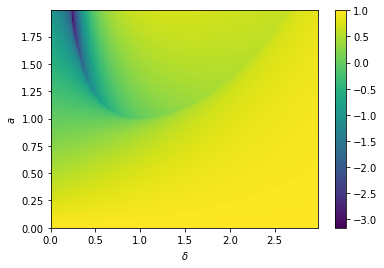

In [106]:
alph = 2; delt = 1
def f(lam):
    return -lam + 1 - alph*np.exp(-delt*lam)

delta = np.arange(0,3, 0.01)
alpha = np.arange(0,2,0.01)

lam_top = np.zeros((len(delta),len(alpha)))
for i in range(len(delta)):
    for j in range(len(alpha)):
        delt = delta[i]; alph = alpha[j]
        lam_top[i,j] = fsolve(f,1);
plt.pcolor(delta, alpha, lam_top.T)
plt.colorbar(); plt.xlabel('$\delta$'); plt.ylabel('$a$');

iv)

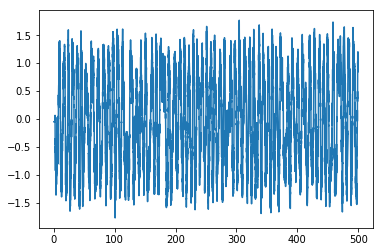

In [123]:
dt = 0.01
N = 50000
alph = 0.9;
delta = 2
sig = 0.5
N_delta = int(delta/dt)
t = np.arange(0,N*dt,dt)
T = np.zeros(N)-0.05;

for i in range(N_delta, N-1):
    dW = np.random.normal()*(dt**.5)
    T[i+1] = T[i] + dt*(T[i] - alph*T[i-N_delta] - T[i]**3) + sig*dW

plt.plot(t, T)

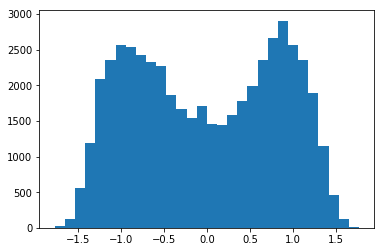

In [124]:
plt.hist(T, bins=30);